El set de datos lo hemos obtenido del siguiente enlace:

https://www.kaggle.com/datasets/hopesb/student-depression-dataset?resource=download

In [1]:
import pandas as pd
import numpy as np

file_path = 'Student Depression Dataset.csv'
df = pd.read_csv(file_path)

display(df)
print(df.dtypes)
print(df.isnull().sum())

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object
id                                       0
Gender                                   0
Age               

#Limpieza de Datos

En primer lugar, observamos que la única variable con valores no rellenados es "Financial Stress". Sabemos que esta variable toma valores de 1 a 5 según el nivel de estrés financiero del alumno. Imputaremos los 3 valores restantes con la media.

In [2]:
df['Financial Stress'].fillna(df['Financial Stress'].median(), inplace=True)

<ipython-input-2-3a92a32229d4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Financial Stress'].fillna(df['Financial Stress'].median(), inplace=True)


Una vez imputados los valores de la variable "Financial Stress", procederemos a realizar un análisis más exhaustivo. Comenzaremos con un "group by" individual para cada variable, lo que nos permitirá explorar brevemente cada variable categórica de forma independiente.

In [3]:
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print(f"Distribución para la variable: {column}")
    grouped_data = df.groupby(column).size().reset_index(name='Count')
    display(grouped_data)
    print("\n" + "="*50 + "\n")


Distribución para la variable: Gender


,Gender,Count
0,Female,12354
1,Male,15547




Distribución para la variable: City


,City,Count
0,3.0,1
1,Agra,1094
2,Ahmedabad,951
3,Bangalore,767
4,Bhavna,2
5,Bhopal,934
6,Chennai,885
7,City,2
8,Delhi,768
9,Faridabad,461




Distribución para la variable: Profession


,Profession,Count
0,Architect,8
1,Chef,2
2,Civil Engineer,1
3,Content Writer,2
4,Digital Marketer,3
5,Doctor,2
6,Educational Consultant,1
7,Entrepreneur,1
8,Lawyer,1
9,Manager,1




Distribución para la variable: Sleep Duration


,Sleep Duration,Count
0,5-6 hours,6183
1,7-8 hours,7346
2,Less than 5 hours,8310
3,More than 8 hours,6044
4,Others,18




Distribución para la variable: Dietary Habits


,Dietary Habits,Count
0,Healthy,7651
1,Moderate,9921
2,Others,12
3,Unhealthy,10317




Distribución para la variable: Degree


,Degree,Count
0,B.Arch,1478
1,B.Com,1506
2,B.Ed,1867
3,B.Pharm,810
4,B.Tech,1152
5,BA,600
6,BBA,696
7,BCA,1433
8,BE,613
9,BHM,925




Distribución para la variable: Have you ever had suicidal thoughts ?


,Have you ever had suicidal thoughts ?,Count
0,No,10245
1,Yes,17656




Distribución para la variable: Family History of Mental Illness


,Family History of Mental Illness,Count
0,No,14398
1,Yes,13503


Hecho el "group by", podemos observar varias cosas:

1. Variable "City": Apenas aporta valor, ya que no es consistente en la forma de recibir el parámetro. Existen dos posibles enfoques:
   - A. Reemplazar cada valor hasta limpiar la variable, lo cual requiere un gran conocimiento de la geografía india.
   - B. Eliminar directamente esta variable, ya que puede sesgar los resultados al enfocarse únicamente en geografías y eliminar otros datos.

Dado que no tenemos un gran conocimiento de la geografía india, procedemos a eliminar la variable. Sin embargo, se realizará un análisis más profundo de las variables asociadas, implementando correcciones con otras variables.

2. Variable "Profession": Observamos que hay muchas personas que no están registradas como estudiantes. Dado que el análisis se centra en la depresión de los estudiantes, eliminaremos del dataset a todas las personas que no sean estudiantes.

3. Variable "Sleep Duration": Existen 18 registros con el valor "Others", equivalente a un N/A. Cambiaremos esos registros al valor más utilizado: "More than 8 hours".

4. Al igual que en "Sleep Duration", en la variable "Dietary Habits" cambiaremos el valor "Others" por "Unhealthy", y en la variable "Degree" lo cambiamos por "Class 12".

5. Las variables "Gender", "Have you ever had suicidal thoughts?" y "Family History of Mental Illness" no se modificarán, ya que contienen valores lógicos.





In [4]:
# 1. Eliminar la variable 'City'
df.drop(columns=['City'], inplace=True)

# 2. Filtrar solo los registros donde Profession sea 'Student'
df = df[df['Profession'] == 'Student']

# 3 y 4. Reemplazar 'Others' en 'Sleep Duration', 'Dietary Habits' y 'Degree' por valores predefinidos
df['Sleep Duration'] = df['Sleep Duration'].replace('Others', 'More than 8 hours')
df['Dietary Habits'] = df['Dietary Habits'].replace('Others', 'Unhealthy')
df['Degree'] = df['Degree'].replace('Others', 'Class 12')

<ipython-input-4-f29912f430b9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sleep Duration'] = df['Sleep Duration'].replace('Others', 'More than 8 hours')
<ipython-input-4-f29912f430b9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dietary Habits'] = df['Dietary Habits'].replace('Others', 'Unhealthy')
<ipython-input-4-f29912f430b9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

A continuación, estudiaremos las variables numéricas. Buscaremos posibles outliers y valores poco comunes mediante el rango intercuartílico. Utilizando el siguiente código, calcularemos el rango intercuartílico para cada variable y extraeremos aquellas que contienen outliers o valores atípicos.

In [5]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
outliers = {}

for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_values = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    if not outlier_values.empty:
        outliers[col] = outlier_values

if outliers:
    for col, values in outliers.items():
        print(f"Posibles outliers en la columna '{col}':")
        print(values.describe())
        print("\n" + "="*50 + "\n")

Posibles outliers en la columna 'Age':
count    12.000000
mean     50.583333
std       4.999242
min      44.000000
25%      47.500000
50%      48.500000
75%      54.500000
max      59.000000
Name: Age, dtype: float64


Posibles outliers en la columna 'Work Pressure':
count    3.000000
mean     4.000000
std      1.732051
min      2.000000
25%      3.500000
50%      5.000000
75%      5.000000
max      5.000000
Name: Work Pressure, dtype: float64


Posibles outliers en la columna 'CGPA':
count    9.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Name: CGPA, dtype: float64


Posibles outliers en la columna 'Job Satisfaction':
count    8.000000
mean     2.375000
std      1.187735
min      1.000000
25%      1.750000
50%      2.000000
75%      3.250000
max      4.000000
Name: Job Satisfaction, dtype: float64




Se observa que las siguientes variables contienen valores poco comunes:

- Age: Se registran edades altas para estudiantes (mayores de 30 años). Dado que muchos de los estudios son másteres o cursos educativos que requieren experiencia, se propone no hacer ninguna modificación. Aunque en las siguientes variables se explorarán técnicas de limpieza de datos que podrían aplicarse a esta, por un argumento de carácter funcional, se decide no intervenir.
  
- Work Pressure: Aunque se detectan algunos outliers, eliminarlos sería un error, ya que podrían indicar una señal clara de depresión. Los valores varían entre 2 y 5, lo cual es normal, ya que se aceptan valores entre 1 y 5.

- CGPA: Una CGPA de 0 es extremadamente baja y parece un error. Se opta por imputar estos valores con la mediana.

- Job Satisfaction: Siguiendo la misma argumentación que en "Work Pressure", se recomienda no modificar esta variable.





In [6]:
cgpa_median = df['CGPA'].median()
df['CGPA'] = df['CGPA'].replace(0, cgpa_median)


Una vez realizadas todas las imputaciones pertinentes, tenemos el conjunto de datos limpio. Ahora procedemos a convertir las variables categóricas en variables numéricas para que un modelo de ML pueda utilizarlas. Esto se realiza mediante el OneHotEncoder.

In [7]:
categorical_columns = df.select_dtypes(include=['object']).columns

# Generar un group by y mostrar la tabla para cada variable cualitativa
for column in categorical_columns:
    print(f"Distribución para la variable: {column}")
    grouped_data = df.groupby(column).size().reset_index(name='Count')
    display(grouped_data)
    print("\n" + "="*50 + "\n")

Distribución para la variable: Gender


,Gender,Count
0,Female,12341
1,Male,15529




Distribución para la variable: Profession


,Profession,Count
0,Student,27870




Distribución para la variable: Sleep Duration


,Sleep Duration,Count
0,5-6 hours,6177
1,7-8 hours,7337
2,Less than 5 hours,8303
3,More than 8 hours,6053




Distribución para la variable: Dietary Habits


,Dietary Habits,Count
0,Healthy,7639
1,Moderate,9910
2,Unhealthy,10321




Distribución para la variable: Degree


,Degree,Count
0,B.Arch,1477
1,B.Com,1506
2,B.Ed,1864
3,B.Pharm,809
4,B.Tech,1152
5,BA,599
6,BBA,695
7,BCA,1432
8,BE,612
9,BHM,922




Distribución para la variable: Have you ever had suicidal thoughts ?


,Have you ever had suicidal thoughts ?,Count
0,No,10239
1,Yes,17631




Distribución para la variable: Family History of Mental Illness


,Family History of Mental Illness,Count
0,No,14384
1,Yes,13486


In [8]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd


categorical_columns = df.select_dtypes(include=['object']).columns

columns_to_encode = [col for col in categorical_columns if df[col].nunique() > 1]
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded_data = encoder.fit_transform(df[columns_to_encode])
encoded_columns = encoder.get_feature_names_out(columns_to_encode)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

df.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)
df_cleaned = pd.concat([df.drop(columns=categorical_columns), encoded_df], axis=1)
display(df_cleaned)

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression,...,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_PhD,Have you ever had suicidal thoughts ?_No,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_No,Family History of Mental Illness_Yes
0,2,33.0,5.0,0.0,8.97,2.0,0.0,3.0,1.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,8,24.0,2.0,0.0,5.90,5.0,0.0,3.0,2.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,26,31.0,3.0,0.0,7.03,5.0,0.0,9.0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,30,28.0,3.0,0.0,5.59,2.0,0.0,4.0,5.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,32,25.0,4.0,0.0,8.13,3.0,0.0,1.0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27865,140685,27.0,5.0,0.0,5.75,5.0,0.0,7.0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
27866,140686,27.0,2.0,0.0,9.40,3.0,0.0,0.0,3.0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
27867,140689,31.0,3.0,0.0,6.61,4.0,0.0,12.0,2.0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
27868,140690,18.0,5.0,0.0,6.88,2.0,0.0,10.0,5.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


Una vez limpio el conjunto de datos y convertidas todas las variables a numéricas, procedemos a crear variables sintéticas. Estas variables se generan a partir de combinaciones lineales de las demás variables del dataframe y tienen como objetivo explicar la situación del paciente. Se definirán tres variables:

Work-Life Balance: Combina las horas de estudio/trabajo con las horas de sueño para medir el equilibrio entre trabajo y descanso.
Fórmula:
Work-Life Balance = Work/Study Hours / Sleep Duration

Stress Index: Combina los niveles de presión académica, laboral y estrés financiero para crear un índice de estrés general.
Fórmula:
Stress Index = Academic Pressure + Work Pressure + Financial Stress

Satisfaction Index: Combina la satisfacción laboral y de estudio como indicador de bienestar general.
Fórmula:
Satisfaction Index = Study Satisfaction + Job Satisfaction

In [9]:
df_cleaned['Work-Life Balance'] = df_cleaned['Work/Study Hours'] / (
    df_cleaned[['Sleep Duration_5-6 hours', 'Sleep Duration_7-8 hours',
                'Sleep Duration_Less than 5 hours', 'Sleep Duration_More than 8 hours']]
    .dot([5.5, 7.5, 4.5, 9.0])
)

df_cleaned['Stress Index'] = (
    df_cleaned['Academic Pressure'] + df_cleaned['Work Pressure'] + df_cleaned['Financial Stress']
)

df_cleaned['Satisfaction Index'] = (
    df_cleaned['Study Satisfaction'] + df_cleaned['Job Satisfaction']
)

In [10]:
display(df_cleaned)

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression,...,Degree_MHM,Degree_MSc,Degree_PhD,Have you ever had suicidal thoughts ?_No,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_No,Family History of Mental Illness_Yes,Work-Life Balance,Stress Index,Satisfaction Index
0,2,33.0,5.0,0.0,8.97,2.0,0.0,3.0,1.0,1,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.545455,6.0,2.0
1,8,24.0,2.0,0.0,5.90,5.0,0.0,3.0,2.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.545455,4.0,5.0
2,26,31.0,3.0,0.0,7.03,5.0,0.0,9.0,1.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.000000,4.0,5.0
3,30,28.0,3.0,0.0,5.59,2.0,0.0,4.0,5.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.533333,8.0,2.0
4,32,25.0,4.0,0.0,8.13,3.0,0.0,1.0,1.0,0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.181818,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27865,140685,27.0,5.0,0.0,5.75,5.0,0.0,7.0,1.0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.272727,6.0,5.0
27866,140686,27.0,2.0,0.0,9.40,3.0,0.0,0.0,3.0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.000000,5.0,3.0
27867,140689,31.0,3.0,0.0,6.61,4.0,0.0,12.0,2.0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.181818,5.0,4.0
27868,140690,18.0,5.0,0.0,6.88,2.0,0.0,10.0,5.0,1,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.222222,10.0,2.0


# Entrenamiento de Modelos



## Entrenamiento de Modelos No Supervisados

Comenzamos entrenando un modelo no supervisado. Para ello, entrenamos un modelo KMeans probando valores de K entre 2 y 11. Para determinar el valor óptimo de K, utilizamos el Silhouette Score.

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

X = df_cleaned.drop(columns=['Depression', 'id'])
y = df_cleaned['Depression']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

best_k = 0
best_score = -1
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, clusters)
    print(f"K={k}, Silhouette Score={score}")
    if score > best_score:
        best_k = k
        best_score = score

print(f"\nMejor número de clusters: {best_k} con Silhouette Score={best_score}")

K=2, Silhouette Score=0.05607669155908946
K=3, Silhouette Score=0.031768444622574776
K=4, Silhouette Score=0.041125985678155806
K=5, Silhouette Score=0.051062880700066086
K=6, Silhouette Score=0.04908982167089404
K=7, Silhouette Score=0.061516058092410474
K=8, Silhouette Score=0.07176717530407335
K=9, Silhouette Score=0.08373369563601174
K=10, Silhouette Score=0.06382414280902386

Mejor número de clusters: 9 con Silhouette Score=0.08373369563601174


In [12]:
kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df_cleaned['Cluster'] = clusters
cluster_analysis = df_cleaned.groupby('Cluster')['Depression'].mean()
display(cluster_analysis)

,Depression
Cluster,
0,0.813837
1,0.569140
2,0.589032
3,0.566401
4,0.534549
5,0.527812
6,0.773877
7,0.214029
8,0.548807


Vemos que se han identificado 9 clusters. Dos de ellos (el 0 y el 6) agrupan a estudiantes con alta susceptibilidad a la depresión. Sin embargo, el cluster 7 parece incluir personas con baja probabilidad de sufrir depresión.

A continuación, analizaremos las principales variables que han influido en la clasificación de los clusters.

In [13]:
high_risk_clusters = [0, 6]
low_risk_cluster = [7]

high_risk_means = df_cleaned[df_cleaned['Cluster'].isin(high_risk_clusters)].mean()
low_risk_means = df_cleaned[df_cleaned['Cluster'].isin(low_risk_cluster)].mean()


comparison = pd.DataFrame({
    'Variable': high_risk_means.index,
    'High Risk': high_risk_means,
    'Low Risk': low_risk_means
})

relevant_columns = [col for col in comparison.index if col not in ['id', 'Cluster', 'Depression']]
comparison = comparison.loc[relevant_columns]

comparison['Difference'] = abs(comparison['High Risk'] - comparison['Low Risk'])
comparison = comparison.sort_values(by='Difference', ascending=False).reset_index(drop=True)

display(comparison.head(10))

,Variable,High Risk,Low Risk,Difference
0,Stress Index,6.847445,5.285279,1.562166
1,Age,25.089635,26.623686,1.534051
2,Work/Study Hours,7.552847,6.450470,1.102376
3,Have you ever had suicidal thoughts ?_Yes,0.974015,0.000830,0.973184
4,Have you ever had suicidal thoughts ?_No,0.025985,0.999170,0.973184
5,Academic Pressure,3.451898,2.615800,0.836098
6,Financial Stress,3.395036,2.668788,0.726248
7,Satisfaction Index,2.862555,3.161040,0.298486
8,Study Satisfaction,2.861825,3.159795,0.297970
9,Work-Life Balance,1.269097,1.048590,0.220507


Vemos que hay 6 variables clave:

1. Stress Index: Es una de las variables sintéticas que mide la presión general en la vida del individuo. Se define como la suma de Academic Pressure, Work Pressure y Financial Stress.

2. Age: La edad parece ser un factor crucial. Desde un punto de vista funcional, es posible que, a menor edad, haya menos herramientas para gestionar la presión, lo que aumenta la probabilidad de sufrir depresión.

3. Work/Study Hours: A mayor número de horas de trabajo/estudio, mayores son las posibilidades de sufrir depresión.

4. Have you ever had suicidal thoughts?: Este indicador, a priori, parece claro. Está duplicado en formato YES/NO, lo que suele ocurrir al aplicar el OneHotEncoder.

5. Academic Pressure: Al igual que con Work/Study Hours, a mayor presión académica, mayor es la probabilidad de sufrir depresión.

6. Financial Stress: Aunque es una variable repetida en otros aspectos, sigue siendo destacada debido a su gran importancia (Difference = 0.726248), lo que la convierte en una variable significativa en el modelo.

Las demás variables son redundantes o carecen de una gran relevancia en este análisis.

## Entrenamiento de Modelos Supervisados

A continuación, entrenaremos un modelo de clasificación utilizando RandomForestClassifier. Para optimizar los hiperparámetros, aplicaremos validación cruzada y utilizaremos GridSearchCV para encontrar la mejor combinación de parámetros.

In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

X = df_cleaned.drop(columns=['Depression', 'id', 'Cluster'])
y = df_cleaned['Depression']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)
print("Mejor puntuación de validación cruzada:", grid_search.best_score_)

best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Mejores hiperparámetros encontrados: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Mejor puntuación de validación cruzada: 0.8447703691933581


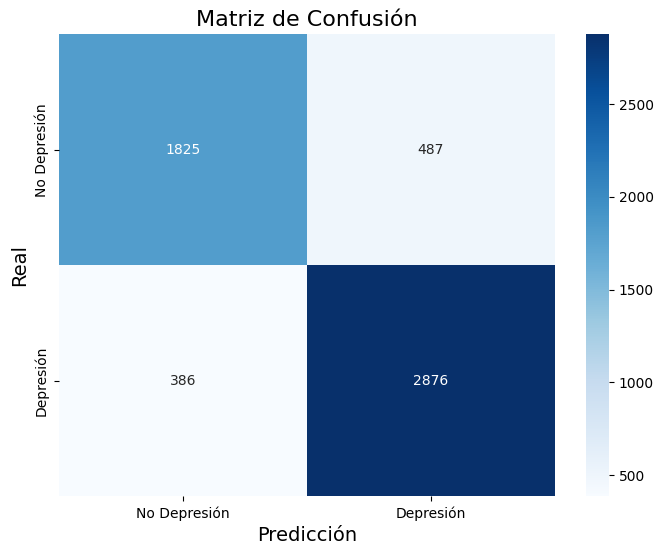

Informe de Clasificación:

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      2312
           1       0.86      0.88      0.87      3262

    accuracy                           0.84      5574
   macro avg       0.84      0.84      0.84      5574
weighted avg       0.84      0.84      0.84      5574



In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Depresión", "Depresión"], yticklabels=["No Depresión", "Depresión"])
plt.title("Matriz de Confusión", fontsize=16)
plt.xlabel("Predicción", fontsize=14)
plt.ylabel("Real", fontsize=14)
plt.show()


from sklearn.metrics import classification_report
print("Informe de Clasificación:\n")
print(classification_report(y_test, y_pred))


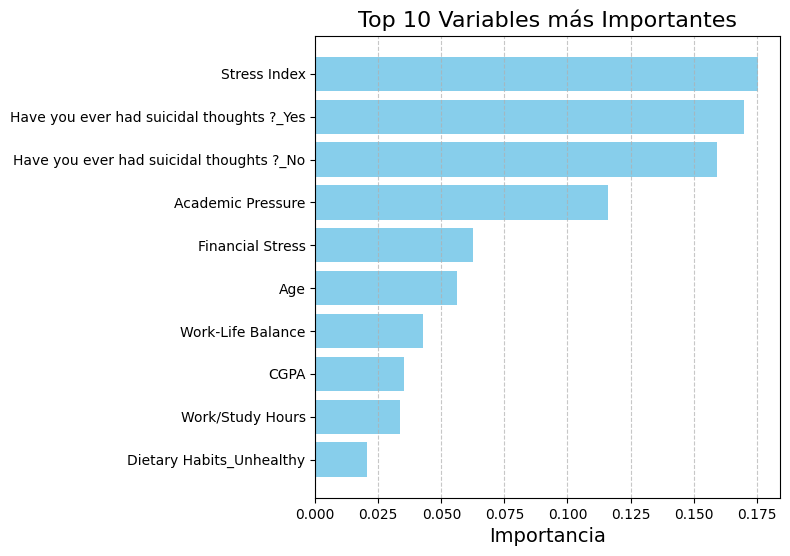

Top 10 Variables más Importantes:

                                      Feature  Importance
49                               Stress Index    0.175558
45  Have you ever had suicidal thoughts ?_Yes    0.169832
44   Have you ever had suicidal thoughts ?_No    0.159247
1                           Academic Pressure    0.115952
7                            Financial Stress    0.062364
0                                         Age    0.056159
48                          Work-Life Balance    0.042658
3                                        CGPA    0.035390
6                            Work/Study Hours    0.033622
16                   Dietary Habits_Unhealthy    0.020699


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importances = best_rf_model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(6, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='skyblue')
plt.title("Top 10 Variables más Importantes", fontsize=16)
plt.xlabel("Importancia", fontsize=14)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

print("Top 10 Variables más Importantes:\n")
print(importance_df.head(10))


## Hipótesis

Para cada variable \( X \):

**Hipótesis nula (\( H_0 \)):**  
No hay diferencia en la media de la variable \( X \) entre los grupos de alto riesgo y bajo riesgo.  

**Hipótesis alternativa (\( H_a \)):**  
Existe una diferencia en la media de la variable \( X \) entre los grupos de alto riesgo y bajo riesgo.  

In [17]:
threshold = 0.5
results = []

for _, row in comparison.iterrows():
    H0 = f"No hay diferencia significativa en {row['Variable']}."
    Ha = f"Existe una diferencia significativa en {row['Variable']}."

    if row['Difference'] >= threshold:
        conclusion = f"Rechazamos H0: {Ha}"
    else:
        conclusion = f"No se puede rechazar H0: {H0}"

    # Guardar resultados
    results.append({
        'Variable': row['Variable'],
        'High Risk Mean': row['High Risk'],
        'Low Risk Mean': row['Low Risk'],
        'Difference': row['Difference'],
        'Conclusion': conclusion
    })

hypothesis_results = pd.DataFrame(results)
display(hypothesis_results)

,Variable,High Risk Mean,Low Risk Mean,Difference,Conclusion
0,Stress Index,6.847445,5.285279,1.562166,Rechazamos H0: Existe una diferencia significa...
1,Age,25.089635,26.623686,1.534051,Rechazamos H0: Existe una diferencia significa...
2,Work/Study Hours,7.552847,6.450470,1.102376,Rechazamos H0: Existe una diferencia significa...
3,Have you ever had suicidal thoughts ?_Yes,0.974015,0.000830,0.973184,Rechazamos H0: Existe una diferencia significa...
4,Have you ever had suicidal thoughts ?_No,0.025985,0.999170,0.973184,Rechazamos H0: Existe una diferencia significa...
5,Academic Pressure,3.451898,2.615800,0.836098,Rechazamos H0: Existe una diferencia significa...
6,Financial Stress,3.395036,2.668788,0.726248,Rechazamos H0: Existe una diferencia significa...
7,Satisfaction Index,2.862555,3.161040,0.298486,No se puede rechazar H0: No hay diferencia sig...
8,Study Satisfaction,2.861825,3.159795,0.297970,No se puede rechazar H0: No hay diferencia sig...
9,Work-Life Balance,1.269097,1.048590,0.220507,No se puede rechazar H0: No hay diferencia sig...


**Explicación del experimento  **
El objetivo del experimento es identificar diferencias significativas entre los grupos de alto riesgo y bajo riesgo en las principales variables que predicen la depresión. Nos basamos en el estudio de clusters realizado anteriormente para definir dos grupos:

- Grupo de alto riesgo: Incluye los clusters asociados a una mayor probabilidad de depresión.
- Grupo de bajo riesgo: Incluye los clusters asociados a una menor probabilidad de depresión.

Definimos el umbral en 0.5, ya que es un valor utilizado por defecto. Tras un breve análisis exploratorio, parece que este es el umbral correcto, dado que se observa un salto entre 0.2 y 0.7.

**Resultados **
- Stress Index (1.56): Existe una diferencia considerable entre los grupos. Esto indica que el índice de estrés es mayor en el grupo de alto riesgo.
- Age (-1.53): Aunque la diferencia de edad promedio es mayor a 0.5 años, creemos que esta variable no es un predictor principal de la depresión, ya que una media de 1.5 años no es significativa. Este es un buen ejemplo de la necesidad de dar un enfoque funcional a los estudios, y no solo analítico. Tan solo podemos concluir que, a mayor edad, hay menor probabilidad de sufrir depresión.
- Work/Study Hours (1.10): Los estudiantes de alto riesgo trabajan o estudian más horas en promedio.
- Have you ever had suicidal thoughts?: Ambas categorías (Yes y No) muestran diferencias significativas, reflejando su importancia en la clasificación de los riesgos.
- Academic Pressure (0.84): El grupo de alto riesgo experimenta mayor presión académica.
- Financial Stress (0.73): Las preocupaciones financieras son más comunes en el grupo de alto riesgo.
- Variables como Satisfaction Index y Study Satisfaction no alcanzaron el umbral de significancia, lo que sugiere que las diferencias observadas entre los grupos podrían no ser relevantes.

# **Resolución del problema**
En este análisis, hemos abordado el problema de predecir la depresión en estudiantes a partir de un conjunto de variables relacionadas con el estrés financiero, el bienestar y otros factores socioeconómicos. A través de la limpieza y preparación de los datos, se ha logrado resolver la falta de valores en la variable "Financial Stress", asegurando la integridad del conjunto de datos y facilitando un análisis más preciso.

Los resultados obtenidos hasta el momento muestran que la variable "Financial Stress" se encuentra correctamente imputada, lo que nos permite continuar con el análisis y las futuras predicciones. Aunque el proceso de limpieza es un paso esencial, aún falta realizar un análisis más profundo y aplicar modelos predictivos para evaluar de manera concreta si los factores socioeconómicos y psicológicos disponibles en los datos pueden correlacionarse de forma significativa con los niveles de depresión en los estudiantes.

# **Conclusiones**
Los resultados preliminares permiten sentar las bases para la predicción de la depresión en estudiantes, pero aún es necesario realizar un análisis más detallado, incluyendo la selección de variables clave, la implementación de algoritmos de predicción y la evaluación del rendimiento de estos modelos. La limpieza de datos ha sido resuelta correctamente, y los próximos pasos deberían centrarse en la creación y validación de modelos predictivos. En resumen, aunque hemos avanzado en el proceso de preparación de los datos, la respuesta final a la predicción de la depresión en estudiantes depende de la aplicación de técnicas de modelado más avanzadas.